In [1]:
###### importing the libraries
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler as ss

In [2]:
## importing the csv file  with data and review 
datafile = 'C:/Users/adeni/OneDrive/Desktop/UALR/2nd_Semester_Spring/Business_App_BINS7304/Assignment/wineTransactions.csv'


In [3]:
## transforming the file into Data frame
wineTrans = pd.read_csv(datafile)

In [4]:
## reviewing the file 
len(wineTrans.index)


6497

In [5]:
## viewing the columns and records in the file
print(wineTrans.info())
wineTrans.head()
wineTrans.shape
wineTrans.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   RecordID      6497 non-null   int64  
 1   fixedAcidity  6497 non-null   float64
 2   pH            6497 non-null   float64
 3   alcohol       6497 non-null   float64
 4   WineType      6497 non-null   object 
 5   Brand         6497 non-null   object 
 6   quality       6497 non-null   float64
 7   sat           6497 non-null   float64
 8   price         6497 non-null   float64
 9   margin        6497 non-null   float64
dtypes: float64(7), int64(1), object(2)
memory usage: 507.7+ KB
None


Index(['RecordID', 'fixedAcidity', 'pH', 'alcohol', 'WineType', 'Brand',
       'quality', 'sat', 'price', 'margin'],
      dtype='object')

In [6]:
## isolating and viewing the relevant variables for clustering 
xDF = wineTrans[[ 'quality', 'sat', 'price', 'margin']]
xDF.head()
xDF.columns


Index(['quality', 'sat', 'price', 'margin'], dtype='object')

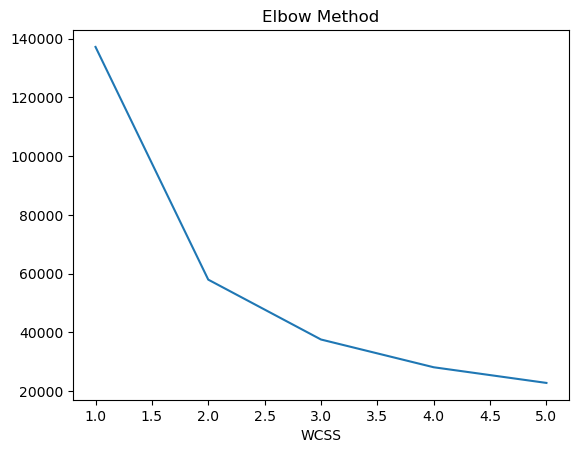

In [7]:
## determining the optimal number of clusters via the Elbow method
wcss = []
for i in range(1,6):
    kmeans = KMeans(n_clusters=i,init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(xDF)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,6), wcss)
plt.title('Elbow Method')
plt.xlabel('WCSS')
plt.show()

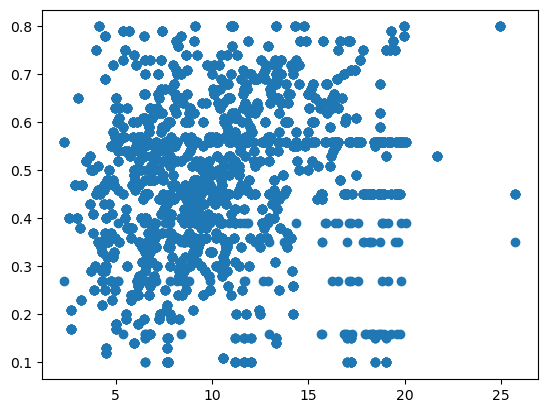

In [8]:
###### scatter plot of the data set 

plt.scatter(xDF.iloc[:, :1].values, xDF.iloc[:,-1].values, cmap='viridis');

In [9]:
### standardizing the  data so they have comparable range and inspecting the new values
scaler = ss()
cols =xDF.columns
scaledDF = pd.DataFrame( data = scaler.fit_transform(xDF), columns=cols)

       quality       sat     price    margin
0    -1.410939 -0.085550 -0.514033  1.811564
1    -0.961146  0.731274  0.056870  0.481408
2    -1.492192  1.296767  0.073417 -0.215341
3     0.335032  0.040115 -0.133431 -0.658727
4    -1.766421 -0.713875 -0.298910 -0.595386
...        ...       ...       ...       ...
6492 -0.853776  0.856939  0.702238 -1.608839
6493  0.413625  1.233934  0.007226  1.304838
6494  0.634894  1.108269  0.056870 -1.418816
6495 -0.741086 -0.713875 -1.324880  1.304838
6496 -1.106966  0.919771  0.561581  1.874905

[6497 rows x 4 columns]


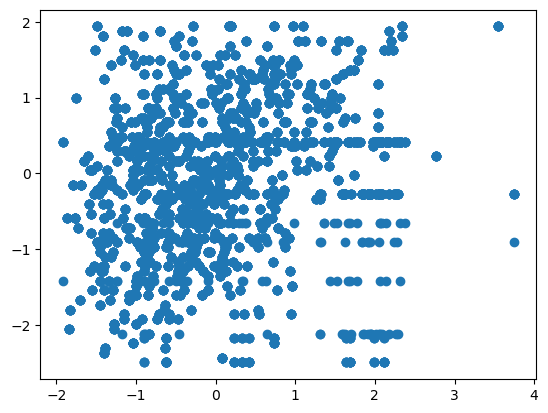

In [10]:
## creating a scatter plot of the first and last columns of the scaledDF DataFrame
plt.scatter(scaledDF.iloc[:, :1].values, scaledDF.iloc[:,-1].values, cmap='viridis');
print(scaledDF)

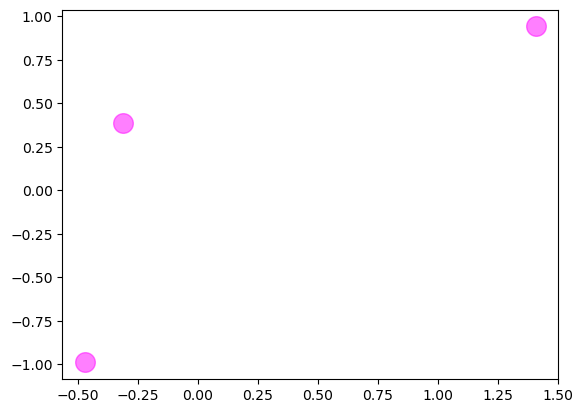

In [11]:
## Performing Kmeans  clustering with 3 clusters 
KMNS = KMeans(init= "random", n_clusters=3, n_init =10, max_iter =300, random_state=42, verbose=0 )
KMNS.fit(scaledDF)
centers = KMNS.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], s=200, alpha=0.5, color = 'magenta');

In [14]:
## creating labels for each of the clusters
labels = KMNS.fit_predict(scaledDF)
print(labels)


[0 0 0 ... 0 1 0]


In [15]:
## filtering the labels using the raw dataset

cluster1 = xDF[labels == 0]
cluster2 = xDF[labels == 1]
cluster3 = xDF[labels == 2]

In [16]:
cluster1.columns
len(cluster1)
len(cluster2)

2377

In [17]:
## Describing one of the clusters
cluster1.describe()

,quality,sat,price,margin
count,2722.000000,2722.000000,2722.000000,2722.000000
mean,8.991076,7.942946,5.550367,0.552428
std,2.804336,0.862943,0.866388,0.136786
min,2.340000,5.400000,3.700000,0.100000
25%,6.696500,7.400000,5.000000,0.470000
50%,8.677000,7.900000,5.430000,0.560000
75%,11.280000,8.500000,6.030000,0.650000
max,15.700000,10.000000,8.380000,0.800000


In [18]:
## printing the cluster information
data = {'clusters':['C1', 'C2', 'C3'], 
'size':[len(cluster1), len(cluster2), len(cluster3)],
'quality': [cluster1['quality'].mean(), cluster2['quality'].mean(), cluster3['quality'].mean()],
'sat': [cluster1['sat'].mean(), cluster2['sat'].mean(), cluster3['sat'].mean()],
'price': [cluster1['price'].mean(), cluster2['price'].mean(),cluster3['price'].mean()],
'margin' :[cluster1['margin'].mean(),cluster2['margin'].mean(), cluster3['margin'].mean()] }
df=pd.DataFrame(data)
print(df)

  clusters  size    quality       sat     price    margin
0       C1  2722   8.991076  7.942946  5.550367  0.552428
1       C2  2377   8.319911  5.759276  4.407404  0.389718
2       C3  1398  16.097069  8.835837  6.754335  0.557532


In [19]:
xDF.info()
xDF.describe()
cluster1.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   quality  6497 non-null   float64
 1   sat      6497 non-null   float64
 2   price    6497 non-null   float64
 3   margin   6497 non-null   float64
dtypes: float64(4)
memory usage: 203.2 KB


,quality,sat,price,margin
count,2722.000000,2722.000000,2722.000000,2722.000000
mean,8.991076,7.942946,5.550367,0.552428
std,2.804336,0.862943,0.866388,0.136786
min,2.340000,5.400000,3.700000,0.100000
25%,6.696500,7.400000,5.000000,0.470000
50%,8.677000,7.900000,5.430000,0.560000
75%,11.280000,8.500000,6.030000,0.650000
max,15.700000,10.000000,8.380000,0.800000


In [20]:
#### export the data on select cluster to csv file for further analysis 

cluster3.to_csv('C:/Users/adeni/OneDrive/Desktop/UALR/2nd_Semester_Spring/Business_App_BINS7304/Assignment/Cluster3Kmeans.csv', index=False)


In [21]:
cluster1S = scaledDF[labels == 0]
cluster2S = scaledDF[labels == 1]
cluster3S = scaledDF[labels == 2]

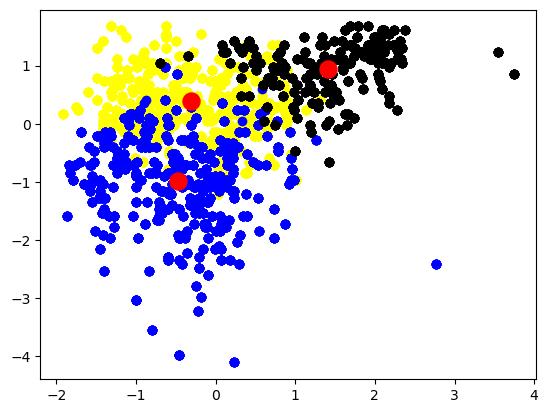

In [22]:
##plot scatter plot using scaled data 
cluster1S.columns
len(cluster1S)
len(cluster2S)
plt.scatter(cluster1S.iloc[:,0] , cluster1S.iloc[:,1], color = 'yellow')
plt.scatter(cluster2S.iloc[:,0] , cluster2S.iloc[:,1], color = 'blue')
plt.scatter(cluster3S.iloc[:,0] , cluster3S.iloc[:,1], color = 'black')
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=150, alpha=1.0 )

In [23]:
## display the plot
plt.show()